# University of Michigan, NA/EECS 568, ROB 530 
# Mobile Robotics: Methods & Algorithms, Winter 2025

## Homework 1 $-$ Estimation & Filtering

- **See the course Canvas for syllabus, due dates, and homework and grading policies.**
- This course utilizes an autograder to evaluate homework. For each of the five problems, carefully read the submission instructions and complete the TODOs in the corresponding Python script. Once you have finished coding, upload all scripts to GradeScope for automatic assessment and grading. Please note, the autograder retains only the latest score, not the highest.
- For each problem, the autograder will check the **return value** of the function you implement. Additionally, the variables are printed in this notebook for you to review.

In [1]:
# run this block to enable autoreload of modules
%load_ext autoreload
%autoreload 2

### Problem 1. Probability Basics (20 points)

Rick has collected four points (in 2D space); let’s call this set `$r$'. He has computed their mean and (biased) sample covariance to be: 
$\begin{equation}    \nonumber
    \mu_r = 
    \begin{bmatrix}
        2 \\
        3
    \end{bmatrix} \quad  
    \Sigma_{rr} = 
    \begin{bmatrix}
        5 & 3 \\
        3 & 7
    \end{bmatrix}
\end{equation}$

And Morty has collected six points (from the same 2D space); let’s call it set $m$, finding their mean and (biased) sample covariance to be:

$\begin{equation}    \nonumber
    \mu_m = 
    \begin{bmatrix}
        -2 \\
        2
    \end{bmatrix} \quad  
    \Sigma_{mm} = 
    \begin{bmatrix}
        8 & 4 \\
        4 & 3
    \end{bmatrix}
\end{equation}$

#### 1.a (5 points)
If Rick computed the sum (over all $r$ points) of $xx^\top$, what value would he have computed?

#### 1.b (5 points)
If Morty computed the sum (over all $m$ points) of $xx^\top$, what value would he have computed?
 
#### 1.c (5 points)
We now wish to compute the mean and sample covariance of all ten points (which we will denote $m+r$).
What is the mean, $\mu_{m+r}$?
        
#### 1.d (5 points)
What is the (biased) sample covariance, $\Sigma_{m+r}$?
    
*Note: Biased sample covariance has $\frac{1}{N}$ whereas the unbiased version has $\frac{1}{N-1}$. The question is making it easier by using the biased formula. See Wikipedia page of Bessel's correction for more explanation.*

#### Submission
Please fill the **TODO**s in the function contained in **probability_basics.py** and submit the file to gradescope. In this problem, you have the option to either directly report the numerical results (accurate to three decimal places) in the TODO block or implement the formula using `numpy`.

In [3]:
from probability_basics import *

mu_r = np.array([[2], [3]])
sigma_rr = np.array([[5, 3], [3, 7]])
mu_m = np.array([[-2], [2]])
sigma_mm = np.array([[8, 4], [4, 3]])
ans_1a, ans_1b, ans_1c, ans_1d = probability_basics(mu_r, sigma_rr, mu_m, sigma_mm)
print('Answer for problem 1a:\n', ans_1a)
print('Answer for problem 1b:\n', ans_1b)
print('Answer for problem 1c:\n', ans_1c)
print('Answer for problem 1d:\n', ans_1d)

Answer for problem 1a:
 [[36 36]
 [36 64]]
Answer for problem 1b:
 [[72  0]
 [ 0 42]]
Answer for problem 1c:
 [[-0.4]
 [ 2.4]]
Answer for problem 1d:
 [[10.64  4.56]
 [ 4.56  4.84]]


### Problem 2. Bayes Filter (20 points)

#### 2.a (10 points)

A robot is equipped with a manipulator to paint an object. Furthermore, the robot has a sensor to detect whether the object is colored or blank. Neither the manipulation unit nor the sensor are   perfect.

  From previous experience you know that the robot succeeds in painting a blank object with a probability of
  
  \begin{equation*}
    p(x_{t+1} = \text{colored} \mid x_t = \text{blank}, u_{t+1} = \text{paint}) = 0.9,
  \end{equation*}

  where $x_{t+1}$ is the state of the object after executing a painting action, $u_{t+1}$ is the   control command, and $x_t$ is the state of the object before performing the action.

  The probability that the sensor indicates that the object is colored although it is blank is given by $p(z = \text{colored} \mid x = \text{blank}) = 0.2$, and the probability that the sensor   correctly detects a colored object is given by $p(z = \text{colored} \mid x = \text{colored}) = 0.7$.

  Unfortunately, you have no knowledge about the current state of the object (i.e., uniform distribution as prior). However, after the robot performed a painting action the sensor of the robot indicates that the object is colored.

  Compute the probability that the object is blank after the robot has performed an action to paint it.

#### Submission
Please fill the **TODO**s in the function contained in **bayes_filter_a.py** and submit the file to gradescope.

In [9]:
from bayes_filter_a import *

print('Answer for Problem 2a:\n', bayes_filter_a(0.9, 0.2, 0.7))

Answer for Problem 2a:
 0.014814814814814814


#### 2.b (10 points)

Consider a robot that resides in a circular world consisting of ten different places that are numbered counterclockwise. The robot is unable to sense the number of its present place directly. However, places 0, 3, and 6 contain a distinct landmark, whereas all other places do not. All three of these landmarks look alike. The likelihood that the robot observes the landmark given it is in one of these places, is 0.8. For all other places, the likelihood of observing the landmark is 0.4.

For each place on the circle, we wish to compute the probability that the robot is in that place given that the following sequence of actions is carried out deterministically and the following sequence of observations is obtained: The robot detects a landmark, moves 3 grid cells counterclockwise and detects a landmark, and then moves 4 grid cells counterclockwise and finally perceives no landmark.

Implement the circular world described above using a discrete Bayes filter in to numerically arrive at the desired belief.

#### Submission
Please fill the **TODO**s in the function contained in **bayes_filter_b.py** and submit the file to gradescope.

Answer for Problem 2b:
     0              0.100

     1              0.075

     2              0.075

     3              0.050

     4              0.150

     5              0.075

     6              0.025

     7              0.300

     8              0.075

     9              0.075



<BarContainer object of 10 artists>

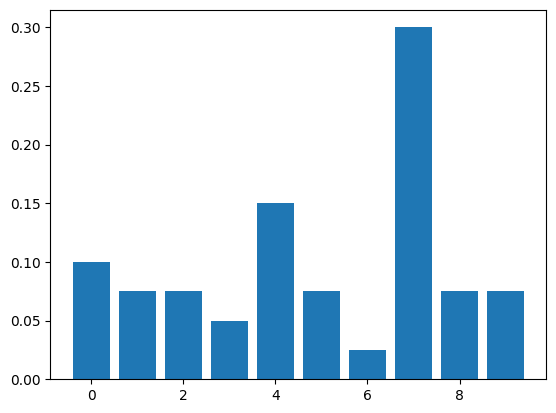

In [11]:
from bayes_filter_b import *

belief = bayes_filter_b()
print('Answer for Problem 2b:')
for i in range(10):
    print("%6d %18.3f\n" % (i, belief[i]))
plt.bar(np.arange(0, 10), belief)

### Problem 3. Target Tracking (20 points)

A target is moving in a 1D plane. The ownship position is known and fixed at the origin; thus, the target's position at time step $k$ is $x_k$. We have no information on the target's trajectory, and thus we model the motion as a Gaussian random walk with a variance of $ 4~\mathrm{m}^2 $. Based on previous measurements, we have an initial guess of the target position as $\mu_0 = 20 ~\mathrm{m}$ with variance $\sigma_{0}^2 = 9 ~\mathrm{m}^2$. We then receive measurement from each of the next two time steps $z_1 = 22 ~\mathrm{m}$ and $z_2 = 23 ~\mathrm{m}$. Each with variance 1 $~\mathrm{m}^2$.

Use a Kalman filter to estimate the state of the target at time step 2 ($\mu _2$ and $\sigma _2 ^2$).

#### Submission
Please fill the **TODO**s in the function contained in **target_tracking.py** and submit the file to gradescope.

In [7]:
from target_tracking import *

print('Answer for Problem 3:\n', target_tracking())

Answer for Problem 3:
 (22.80722891566265, 0.8313253012048191)


### Problem 4. First-Order Covariance Propagation (20 points)

In most SLAM approaches, the noise characteristics of individual observations are linearized, resulting in a Gaussian covariance matrix. In this task, we explore the effects of the error introduced via linearization.

Consider a robot sensor that observes range and bearing to nearby landmarks. In this case, the range error is relatively small, but the bearing error is large. We are interested in determining the $(x, y)$ position of the beacon based on observations obtained by the robot at the origin $(0, 0)$. For this problem, the robot does not move.

Suppose you obtain a (range, bearing) observation with mean ($10.0$ m, $0$ rad) whose range standard deviation is $0.5$ m, and whose bearing standard deviation is $0.25$ rad. The range and bearing measurements are Gaussian and independent.

#### Submission
Please fill the **TODO**s in the function contained in **covariance_propagation.py** and submit the file to gradescope. The values in the `result` dict will be evaluated.

Due to autograder requirement, code involving `np.random.randn` and `np.random.multivariate_normal` is provided. **DO NOT** change these lines or use other `random` functions in your code, otherwise the autograder will fail.

In [12]:
from covariance_propagation import *

#### 4.a (4 points)

Generate a point cloud representing 10,000 samples from the distribution over the position of the   beacon as measured in
  1. the sensor frame, i.e. $(r, \theta)$ space and
  2. the Cartesian $(x, y)$ coordinate frame.
  
In other words, generate observations of (range, bearing) and project these points into $(x,y)$.   (Hint: use the *numpy.random.randn()* function in python, and recall that you can sample from a univariate Gaussian with mean $\mu$ and standard deviation $\sigma$ with $\mu + \sigma \cdot randn$.)

[[[ 0.98564836  0.99708486  0.98886871 ...  0.99552984  0.90963888
    0.9191103 ]
  [ 1.73003996  0.75773154  1.5360922  ... -0.91116738 -4.25696994
    4.06694796]]

 [[-0.16881144 -0.07630064 -0.14879072 ...  0.09444751  0.41539994
   -0.39400033]
  [10.10127638  9.90191795 10.20892655 ...  9.60421651  9.32187259
    9.487235  ]]]
Answer for Problem 4a:


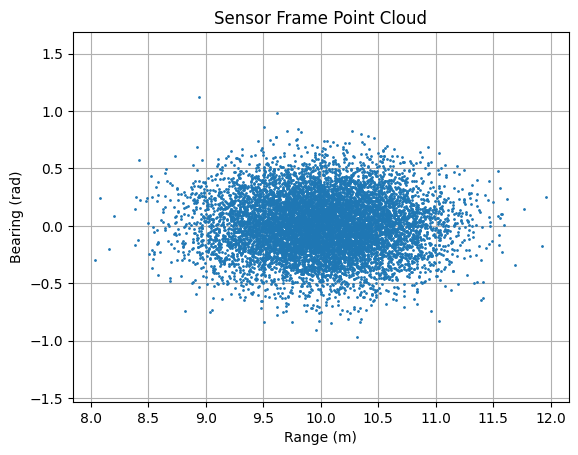

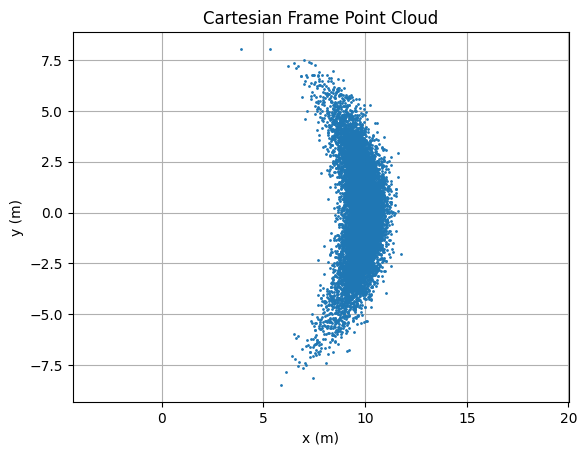

In [23]:
np.random.seed(42)
result = covariance_propagation()
r = result['r']
theta = result['theta']
x = result['x']
y = result['y']

print('Answer for Problem 4a:')
## Observation in the sensor frame
plt.plot(r, theta, '.', markersize=2)
plt.axis('equal')
plt.grid(True)
plt.title('Sensor Frame Point Cloud')
plt.xlabel('Range (m)')
plt.ylabel('Bearing (rad)')
plt.show()

## Observation in the Cartesian frame
plt.plot(x, y, '.', markersize=2)
plt.axis('equal')
plt.grid(True)
plt.title('Cartesian Frame Point Cloud')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

#### 4.b (4 points)

What is the (linearized) covariance of the beacon position in $(x, y)$ coordinates? In other words,   write the covariance of an observation in $(x,y)$ coordinates in terms of the covariance of the   observation in (range, bearing) coordinates. The transformation is non-linear, so you will need to compute a first-order approximation (Taylor expansion) of the transformation function.

In [27]:
np.random.seed(42)
result = covariance_propagation()
Jacobian = result['Jacobian']
cov_cartesian = result['cov_cartesian']

print('Answer for Problem 4b:')
print('Jacobian:\n', Jacobian)
print('\nSigma_cartesian:\n', cov_cartesian)

Answer for Problem 4b:
Jacobian:
 [[ 1. -0.]
 [ 0. 10.]]

Sigma_cartesian:
 [[0.25 0.  ]
 [0.   6.25]]


#### 4.c (4 points)

Draw in red the 1-sigma, 2-sigma, and 3-sigma contours of the analytical (linearized) covariance ellipses, super-imposed over the point clouds generated in parts A.i and A.ii. Now overlay in blue the actual covariance ellipses computed using sample-based expressions for the first and second moments. **For you to explore:** Do they agree?  Why or why not?

Answer for Problem 4c:
mu_sensor:
 [10, 0]

cov_sensor:
 [[0.25   0.    ]
 [0.     0.0625]]

mu_sensor_sample:
 [9.99893201e+00 3.38351327e-03]

cov_sensor_sample:
 [[ 0.25173419 -0.00107397]
 [-0.00107397  0.06262635]]

mu_cartesian:
 [10.  0.]

cov_cartesian:
 [[0.25 0.  ]
 [0.   6.25]]

mu_cartesian_sample:
 [9.69070225 0.03198405]

cov_cartesian_sample:
 [[ 0.42604726 -0.02019572]
 [-0.02019572  5.89420197]]


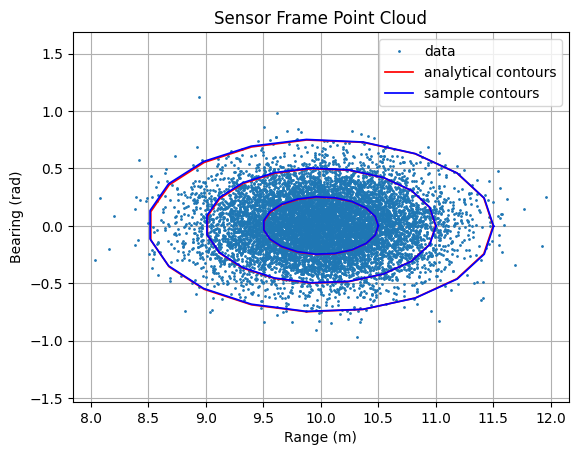

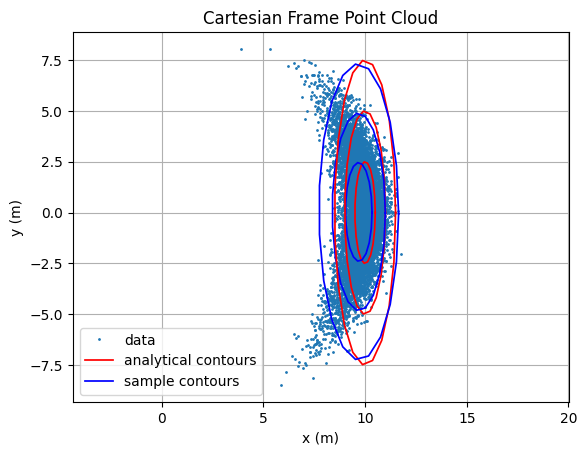

In [36]:
np.random.seed(42)
result = covariance_propagation()
mu_sensor = result['mu_sensor']
cov_sensor = result['cov_sensor']
mu_sensor_sample = result['mu_sensor_sample']
cov_sensor_sample = result['cov_sensor_sample']
mu_cartesian = result['mu_cartesian']
cov_cartesian = result['cov_cartesian']
mu_cartesian_sample = result['mu_cartesian_sample']
cov_cartesian_sample = result['cov_cartesian_sample']

print('Answer for Problem 4c:')

print('mu_sensor:\n', mu_sensor)
print('\ncov_sensor:\n', cov_sensor)
print('\nmu_sensor_sample:\n', mu_sensor_sample)
print('\ncov_sensor_sample:\n', cov_sensor_sample)
print('\nmu_cartesian:\n', mu_cartesian)
print('\ncov_cartesian:\n', cov_cartesian)
print('\nmu_cartesian_sample:\n', mu_cartesian_sample)
print('\ncov_cartesian_sample:\n', cov_cartesian_sample)

## Sensor frame

plt.plot(r, theta, '.', markersize=2, label='data')
plt.axis('equal')
plt.grid(True)
plt.title('Sensor Frame Point Cloud')
plt.xlabel('Range (m)')
plt.ylabel('Bearing (rad)')
plt.legend()

for i in range(3):
    # analytical contous in red
    draw_ellipse(mu_sensor, cov_sensor, (i+1)**2, 'red')
    # sample contous in blue
    draw_ellipse(mu_sensor_sample, cov_sensor_sample, (i+1)**2, 'blue')

plt.legend()
plt.show()

## Cartesian frame

plt.plot(x, y, '.', markersize=2, label='data')
plt.axis('equal')
plt.grid(True)
plt.title('Cartesian Frame Point Cloud')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

for i in range(3):
    # analytical contous in red
    draw_ellipse(mu_cartesian, cov_cartesian, (i+1)**2, 'red')    
    # sample contous in blue
    draw_ellipse(mu_cartesian_sample, cov_cartesian_sample, (i+1)**2, 'blue')

plt.legend()
plt.show()

#### 4.d (4 points)

From a purely theoretical perspective, assuming that the underlying process is truly Gaussian, we expect 39.35% of all samples to lie within the 1-sigma contour, 86.47\% of samples to lie within the 2-sigma contour, and 98.89% to lie within the 3-sigma contour. (These frequencies were computed using the cumulative chi-square distribution for two degrees-of-freedom)

Count the samples falling within each (analytical) ellipse. The error of a particular sample $x$, measured in "units" of sigma, is known as the Mahalanobis distance, and can be computed as $\sqrt{(x-\mu)^\top\Sigma^{-1}(x-\mu)}$.

In [71]:
np.random.seed(42)
result = covariance_propagation()
count_sensor = result['count_sensor']
count_cartesian = result['count_cartesian']
N = result['N']

print('Answer for Problem 4d:')
Gaussian = [0.39, 0.86, 0.99];
print("         Sensor frame  Cartesian frame  Gaussian\n")
for k in range(3):
    print('%d-sigma%10.2f%16.2f%13.2f\n' % (k+1, count_sensor[k]/N, count_cartesian[k]/N, Gaussian[k]))

Answer for Problem 4d:
         Sensor frame  Cartesian frame  Gaussian

1-sigma      0.39            0.39         0.39

2-sigma      0.86            0.80         0.86

3-sigma      0.99            0.93         0.99



/tmp/ipykernel_389075/2463896363.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d-sigma%10.2f%16.2f%13.2f\n' % (k+1, count_sensor[k]/N, count_cartesian[k]/N, Gaussian[k]))


**For you to explore:** If the point samples were truly distributed as a Gaussian (clearly, the $(x,y)$ are not), your counts would match the theoretically predicted values. Try varying the noise parameters: under what conditions do the counts come close to matching the theoretically predicted values? What consequences to a state estimation algorithm could these sorts of errors have? Discuss your thoughts on Piazza.

#### 4.e (4 points)

Suppose now that the (range, bearing) measurements are *not independent* but instead jointly correlated under the following three scenarios: \
a) $\rho_{{r\theta}}=0.1$, \
b) $\rho_{r\theta}=0.5$, and \
c) $\rho_{r\theta}=0.9$. 

Repeat parts 4.a and 4.c.

Answer for Problem 4e:


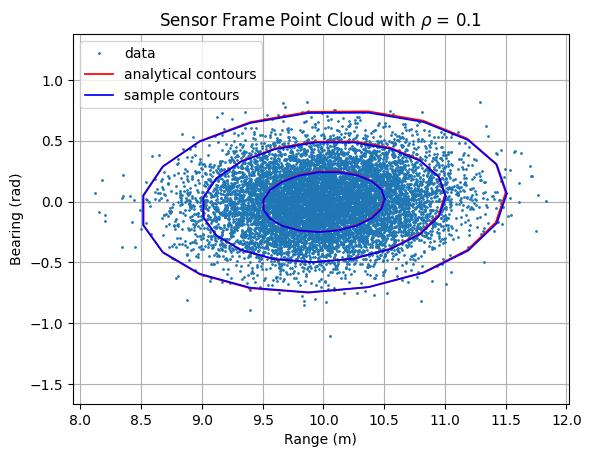

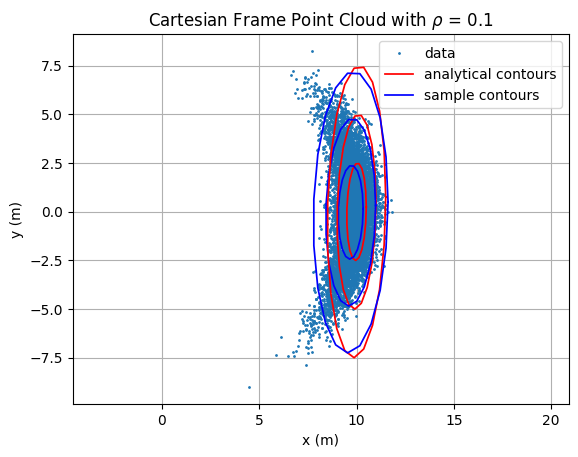

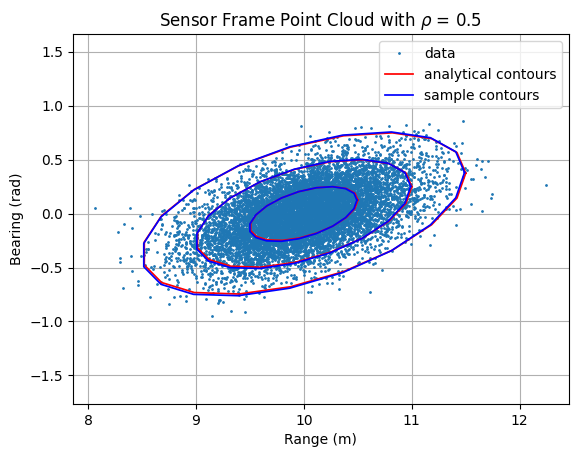

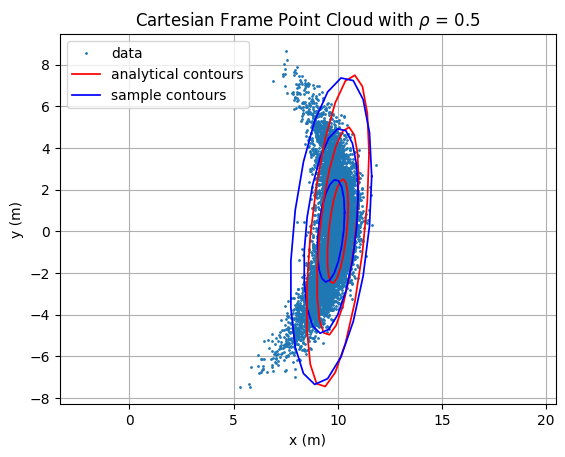

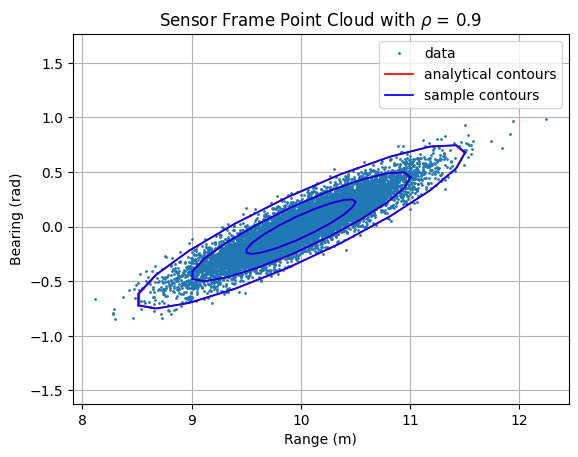

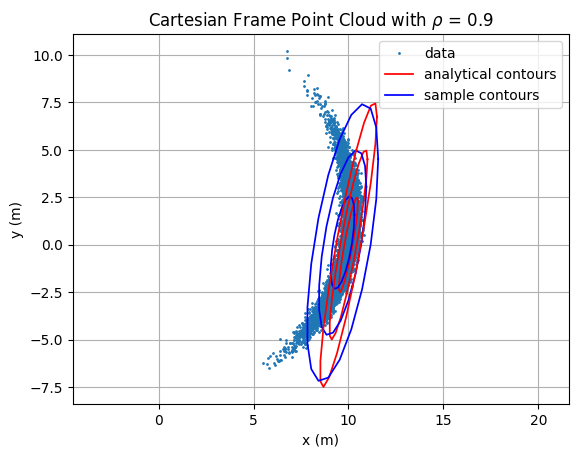

In [48]:
np.random.seed(42)
result = covariance_propagation()
print('Answer for Problem 4e:')
for rho in [0.1, 0.5, 0.9]:
    r = result['4e'][rho]['r']
    theta = result['4e'][rho]['theta']
    x = result['4e'][rho]['x']
    y = result['4e'][rho]['y']
    mu_sensor = result['4e'][rho]['mu_sensor']
    cov_sensor = result['4e'][rho]['cov_sensor']
    mu_sensor_sample = result['4e'][rho]['mu_sensor_sample']
    cov_sensor_sample = result['4e'][rho]['cov_sensor_sample']
    mu_cartesian = result['4e'][rho]['mu_cartesian']
    cov_cartesian = result['4e'][rho]['cov_cartesian']
    mu_cartesian_sample = result['4e'][rho]['mu_cartesian_sample']
    cov_cartesian_sample = result['4e'][rho]['cov_cartesian_sample']

    # Sensor frame
    plt.plot(r, theta, '.', markersize=2, label='data')
    plt.axis('equal')
    plt.grid(True)
    plt.title(r'Sensor Frame Point Cloud with $\rho$ = %.1f' % rho)
    plt.xlabel('Range (m)')
    plt.ylabel('Bearing (rad)')
    plt.legend()

    # plot the ellipses
    for i in range(3):
        # analytical contous in red
        draw_ellipse(mu_sensor, cov_sensor, (i+1)**2, 'red')
        # sample contous in blue
        draw_ellipse(mu_sensor_sample, cov_sensor_sample, (i+1)**2, 'blue')

    plt.legend()
    plt.show()

    # Cartesian frame
    plt.plot(x, y, '.', markersize=2, label='data')
    plt.axis('equal')
    plt.grid(True)
    plt.title(r'Cartesian Frame Point Cloud with $\rho$ = %.1f' % rho)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

    # plot the ellipses
    for i in range(3):
        # analytical contous in red
        draw_ellipse(mu_cartesian, cov_cartesian, (i+1)**2, 'red')    
        # sample contous in blue
        draw_ellipse(mu_cartesian_sample, cov_cartesian_sample, (i+1)**2, 'blue')

    plt.legend()
    plt.show()

### Problem 5. Estimation

Assume that we want to estimate an unobserved population parameter $\theta$ on the basis of observations $x$. Let $f$ be the sampling distribution of $x$ so that $f(x|\theta)$ is the probability of $x$ when the underlying population parameter is $\theta$. The function $L(\theta) = f(x|\theta)$ when viewed as a function of the parameter $\theta$ is called the likelihood function or just the likelihood.
For example, if $x$ follows a Gaussian distribution, we will have $\theta = (\mu, \sigma^2)$ and $$\mu, \sigma \mapsto f(x|\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2\pi}}\exp(-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2})$$ is the likelihood. 

**Maximum Likelihood Estimator (MLE):** The maximum likelihood method maximizes the likelihood function, leading to the MLE
\begin{equation} 
    \nonumber \hat{\theta}_{MLE} = \text{argmax}_\theta L(\theta) = \text{argmax}_\theta f(x|\theta).
\end{equation}

**Maximum A Posteriori (MAP) Estimator:** In the Bayesian framework, one can place a prior distribution over the parameter, i.e., $g(\theta)$. Then, the MAP estimator maximizes the posterior probability density function $f(\theta|x)$ as follows.
\begin{equation}\nonumber
    \hat{\theta}_{MAP} = \text{argmax}_\theta f(\theta|x)
    = \text{argmax}_\theta \frac{f(x|\theta)g(\theta)}{\int_\Theta f(x|\vartheta)g(\vartheta)d\vartheta}
    = \text{argmax}_\theta f(x|\theta)g(\theta),
\end{equation}
were the last equality is true because the normalization constant in the Bayes' formula is independent of $\theta$.

**Remark 1:**
Since $\log$ is a monotonic function, it is often the case that we use the logarithm of the likelihood or posterior for maximization (or negative of the logarithm for minimization).

**Remark 2:**
In this case, $x$ is a known noisy measurement of $θ$ and its distribution is $\mathcal{N}(\mu_x, \sigma^2_x).$


Now suppose we have a continuous random variable $\theta \sim \mathcal{N}(\mu,\sigma^2)$. We wish to infer its mean and variance as we obtain normally distributed measurements sequentially. For the case of a random mean, $\mu$, and fixed variance, $\sigma^2$: 


#### Submission
Please fill the **TODO**s in the function contained in **estimation.py** and submit the file to gradescope.

In [49]:
from estimation import *

#### 5.a (5 points)

You will get 5 points for implementing `Inference` function correctly.

Derive formulas to make a Bayesian inference so that we can infer both the mean and the variance. 

**Hint:** Use Bayes' formula and substitute the Gaussian prior and likelihood in the formula.

#### 5.b (5 points)

You will get 5 points for implementing `estimation_MAP` function correctly. Your `estimation_MAP` function will be tested using the accurate version of the `Inference` function. Therefore, you can still proceed with this problem and earn points even if you encounter difficulties with problem 5.a.

You are responsible for purchasing a sensor that can measure the range (distance) to an object. 
Sensor I (\$100) and II (\$500) are both used to measure the range to an object. 
Suppose the measurements are noisy values of the range, $x$, such that $z \sim \mathcal{N}(\mu_z,\sigma_z^2)$ with variances of 1 (I) and 0.64 (II). The measurements obtained from these sensors can be seen in Table I and II. Parameterize the prior of $x$ with $\mu = 0$ and $\sigma ^2 = 1000$. Using the derivations from part B, write a function that takes data as input and solves the inference recursively.

#### b.1 
Use the sensor data and the function to infer the mean and variance of the normally distributed random variable $x$ conditioned only on $z_1$.

#### b.2 
Use the sensor data and the function to infer the mean and variance of the normally distributed random variable $x$ conditioned only on $z_2$.

**For you to explore:** 
Why is it that $x$ is more precise (https://en.wikipedia.org/wiki/Precision_(statistics)) when conditioned on $z_1$ even though sensor II is more accurate? which sensor do you recommend to be purchased?

Table 1: Sensor I Data
    
| N   | $Z_1$     |
| --- | --------- |
| 1   | 10.6715   |
| 2   | 8.7925    |
| 3   | 10.7172   |
| 4   | 11.6302   |
| 5   | 10.4889   |
| 6   | 11.0347   |
| 7   | 10.7269   |
| 8   | 9.6966    |
| 9   | 10.2939   |
| 10  | 9.2127    |

Table 2: Sensor II Data
    
| N   | $Z_2$     |
| --- | --------- |
| 1   | 10.7107   |
| 2   | 9.0823    |
| 3   | 9.1449    |
| 4   | 9.3524    |
| 5   | 10.2602   |

In [63]:
mean_1, variance_1, mean_2, variance_2 = estimation_MAP(Inference)
print('Answer for Problem 5b:')
print("sensor   mean  variance  precision(1/variance)")
print("  I%11.3f%8.3f%10.3f" % (mean_1, variance_1, 1/variance_1))
print(" II%11.3f%8.3f%10.3f" % (mean_2, variance_2, 1/variance_2))

Answer for Problem 5b:
sensor   mean  variance  precision(1/variance)
  I     10.325   0.100    10.001
 II      9.709   0.128     7.813


#### 5.c (10 points)


You will get 5 points for implementing `KF_update` function correctly, and another 5 points for implementing `estimation_KF` function correctly. Your `estimation_KF` function will be tested using the accurate version of the `KF_update` function. Therefore, you can still proceed with this problem and earn points even if you encounter difficulties with `KF_update` function.

Use a Kalman filter class and write a program to solve b.1 and b.2. Compare your results with the MAP estimator. 

**For you to explore:** What is the conclusion now and why? Discuss your thoughts on Piazza.

In [66]:
mean_1, variance_1, mean_2, variance_2 = estimation_KF(KF_update)

print('Answer for Problem 5c:')
print("sensor   mean  variance  precision(1/variance)")
print("  I%11.3f%8.3f%10.3f" % (mean_1, variance_1, 1/variance_1))
print(" II%11.3f%8.3f%10.3f" % (mean_2, variance_2, 1/variance_2))

Answer for Problem 5c:
sensor   mean  variance  precision(1/variance)
  I     10.325   0.100    10.001
 II      9.709   0.128     7.814
